In [1]:
import sys
sys.path.append('..')
import os
os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

import brasa

In [2]:
man = brasa.engine.CacheManager()
con = man.db_connection

In [3]:
con.view("b3-cotahist").columns

['regtype',
 'refdate',
 'bdi_code',
 'symbol',
 'instrument_market',
 'corporation_name',
 'specification_code',
 'days_to_settlement',
 'trading_currency',
 'open',
 'high',
 'low',
 'average',
 'close',
 'best_bid',
 'best_ask',
 'trade_quantity',
 'traded_contracts',
 'volume',
 'strike_price',
 'strike_price_adjustment_indicator',
 'maturity_date',
 'allocation_lot_size',
 'strike_price_in_points',
 'isin',
 'distribution_id']

In [4]:
con.sql("select * from 'b3-cotahist' where instrument_market = 10 and isin[7:9] in ('UNT', 'CDA', 'ACN')")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────┬─────────────────────┬──────────┬─────────┬───┬──────────────────────┬──────────────┬─────────────────┐
│ regtype │       refdate       │ bdi_code │ symbol  │ … │ strike_price_in_po…  │     isin     │ distribution_id │
│ varchar │      timestamp      │  int64   │ varchar │   │        double        │   varchar    │      int64      │
├─────────┼─────────────────────┼──────────┼─────────┼───┼──────────────────────┼──────────────┼─────────────────┤
│ 01      │ 2021-02-12 00:00:00 │        2 │ RDNI3   │ … │                  0.0 │ BRRDNIACNOR9 │             113 │
│ 01      │ 2021-01-04 00:00:00 │        2 │ PGMN3   │ … │                  0.0 │ BRPGMNACNOR8 │             100 │
│ 01      │ 2021-02-12 00:00:00 │        2 │ RPAD6   │ … │                  0.0 │ BRRPADACNPB2 │             197 │
│ 01      │ 2021-02-12 00:00:00 │        2 │ SAPR3   │ … │                  0.0 │ BRSAPRACNOR9 │             151 │
│ 01      │ 2021-02-12 00:00:00 │        2 │ SAPR4   │ … │                  0.0 

In [60]:
con.sql("select refdate, symbol, close, distribution_id from 'b3-cotahist' where instrument_market = 10 and isin[7:9] = 'CTF' and bdi_code = 14 and specification_code[:2] = 'CI'")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────────┬─────────┬────────┬─────────────────┐
│       refdate       │ symbol  │ close  │ distribution_id │
│      timestamp      │ varchar │ double │      int64      │
├─────────────────────┼─────────┼────────┼─────────────────┤
│ 2011-02-18 00:00:00 │ MILA11  │  47.69 │             100 │
│ 2011-02-22 00:00:00 │ FSTU11  │   1.17 │               2 │
│ 2011-02-23 00:00:00 │ MOBI11  │   17.7 │             100 │
│ 2011-02-23 00:00:00 │ PIBB11  │  94.11 │             100 │
│ 2011-02-25 00:00:00 │ FSRF11  │   0.32 │               2 │
│ 2011-03-03 00:00:00 │ FNOR11  │   0.55 │               2 │
│ 2011-03-04 00:00:00 │ FNOR11  │   0.55 │               2 │
│ 2011-03-04 00:00:00 │ MOBI11  │  17.95 │             100 │
│ 2011-03-10 00:00:00 │ FSRF11  │   0.35 │               2 │
│ 2011-03-15 00:00:00 │ BRAX11  │  43.06 │             100 │
│          ·          │   ·     │     ·  │              ·  │
│          ·          │   ·     │     ·  │              ·  │
│          ·          │ 

In [5]:
res = con.sql("select refdate, symbol, close, distribution_id from 'b3-cotahist' where symbol = 'BOVA11' order by refdate")
res

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────────┬─────────┬────────┬─────────────────┐
│       refdate       │ symbol  │ close  │ distribution_id │
│      timestamp      │ varchar │ double │      int64      │
├─────────────────────┼─────────┼────────┼─────────────────┤
│ 2008-12-02 00:00:00 │ BOVA11  │  35.39 │             100 │
│ 2008-12-03 00:00:00 │ BOVA11  │  35.31 │             100 │
│ 2008-12-04 00:00:00 │ BOVA11  │   35.7 │             100 │
│ 2008-12-05 00:00:00 │ BOVA11  │  35.35 │             100 │
│ 2008-12-08 00:00:00 │ BOVA11  │  38.46 │             100 │
│ 2008-12-09 00:00:00 │ BOVA11  │  37.54 │             100 │
│ 2008-12-10 00:00:00 │ BOVA11  │  39.03 │             100 │
│ 2008-12-11 00:00:00 │ BOVA11  │  38.89 │             100 │
│ 2008-12-12 00:00:00 │ BOVA11  │  39.11 │             100 │
│ 2008-12-15 00:00:00 │ BOVA11  │  38.57 │             100 │
│          ·          │   ·     │    ·   │              ·  │
│          ·          │   ·     │    ·   │              ·  │
│          ·          │ 

In [30]:
res = con.sql("""
with cal as (
    select refdate
    from calendar
    where isbizday_B3 = true and refdate < today()
), ch as (
    select refdate, symbol, close, distribution_id
    from 'b3-cotahist'
    where symbol = 'VALE3'
)
select * from (
    select cal.refdate, ch.symbol, ch.close, ch.distribution_id
    from cal
    left join ch on cal.refdate = ch.refdate
    where cal.refdate between (select min(refdate) from ch) and (select max(refdate) from ch)
)
order by refdate
""")
res

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌────────────┬─────────┬────────┬─────────────────┐
│  refdate   │ symbol  │ close  │ distribution_id │
│    date    │ varchar │ double │      int64      │
├────────────┼─────────┼────────┼─────────────────┤
│ 2001-01-02 │ VALE3   │   43.2 │             157 │
│ 2001-01-03 │ VALE3   │   46.0 │             157 │
│ 2001-01-04 │ VALE3   │   44.5 │             157 │
│ 2001-01-05 │ VALE3   │   44.0 │             157 │
│ 2001-01-08 │ VALE3   │   43.5 │             157 │
│ 2001-01-09 │ VALE3   │   44.0 │             157 │
│ 2001-01-10 │ VALE3   │  43.99 │             157 │
│ 2001-01-11 │ VALE3   │  43.25 │             157 │
│ 2001-01-12 │ VALE3   │   43.0 │             157 │
│ 2001-01-15 │ VALE3   │   43.5 │             157 │
│     ·      │   ·     │     ·  │              ·  │
│     ·      │   ·     │     ·  │              ·  │
│     ·      │   ·     │     ·  │              ·  │
│ 2023-05-22 │ VALE3   │   68.1 │             207 │
│ 2023-05-23 │ VALE3   │  66.56 │             207 │
│ 2023-05-24

In [31]:
df = res.to_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

<AxesSubplot: xlabel='refdate', ylabel='close'>

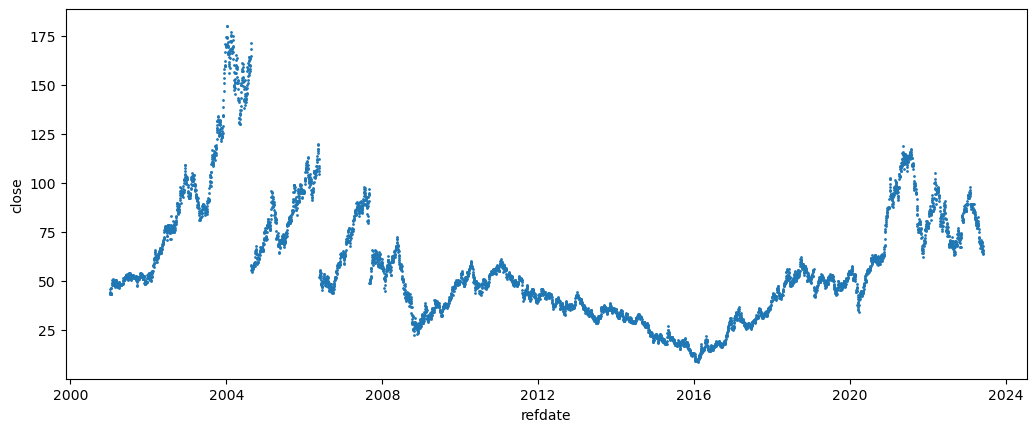

In [32]:
df.plot(x="refdate", y="close", kind="scatter", s=1)

In [33]:
res = con.sql("select distinct refdate, symbol, close, distribution_id from 'b3-cotahist' where symbol in ('BOVA11', 'PIBB11', 'SMAL11', 'DIVO11') order by refdate")
res

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────────┬─────────┬────────┬─────────────────┐
│       refdate       │ symbol  │ close  │ distribution_id │
│      timestamp      │ varchar │ double │      int64      │
├─────────────────────┼─────────┼────────┼─────────────────┤
│ 2004-07-26 00:00:00 │ PIBB11  │   26.4 │             100 │
│ 2004-07-27 00:00:00 │ PIBB11  │  26.93 │             100 │
│ 2004-07-28 00:00:00 │ PIBB11  │  27.45 │             100 │
│ 2004-07-29 00:00:00 │ PIBB11  │  27.59 │             100 │
│ 2004-07-30 00:00:00 │ PIBB11  │   27.7 │             100 │
│ 2004-08-02 00:00:00 │ PIBB11  │  27.75 │             100 │
│ 2004-08-03 00:00:00 │ PIBB11  │  27.75 │             100 │
│ 2004-08-04 00:00:00 │ PIBB11  │  27.65 │             100 │
│ 2004-08-05 00:00:00 │ PIBB11  │   26.9 │             100 │
│ 2004-08-06 00:00:00 │ PIBB11  │   26.6 │             100 │
│          ·          │   ·     │     ·  │              ·  │
│          ·          │   ·     │     ·  │              ·  │
│          ·          │ 

In [34]:
df = res.to_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

<AxesSubplot: xlabel='refdate'>

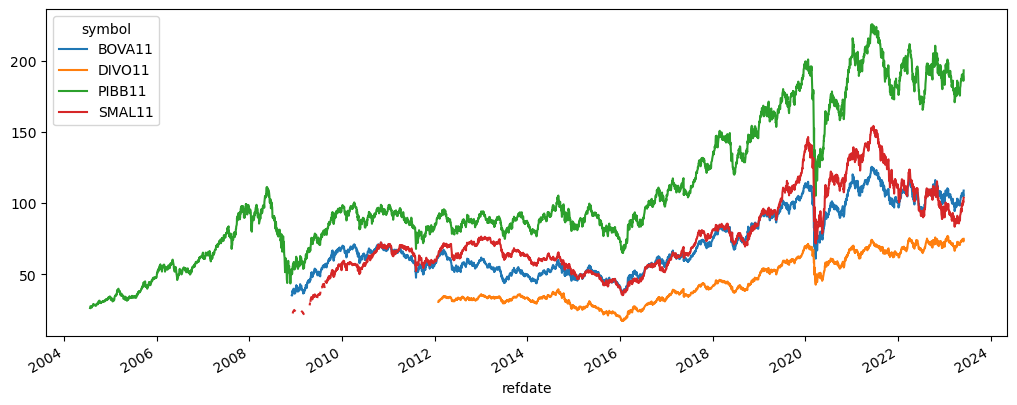

In [35]:
df.pivot(index="refdate", columns="symbol", values="close").plot()

In [45]:
res = con.sql("""
with cal as (
    select refdate
    from calendar
    where isbizday_B3 = true and refdate < today()
), ch as (
    select refdate, symbol, close, distribution_id
    from 'b3-cotahist'
    where symbol = 'DIVO11'
)
select * from (
    select cal.refdate, ch.symbol, ch.close, ch.distribution_id
    from cal
    left join ch on cal.refdate = ch.refdate
    where cal.refdate between (select min(refdate) from ch) and (select max(refdate) from ch)
)
order by refdate
""")
df = res.fetchdf()
df.loc[df.close.isna(), :]

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,refdate,symbol,close,distribution_id
11,2012-02-15,NaN,NaN,NaN
13,2012-02-17,NaN,NaN,NaN
51,2012-04-16,NaN,NaN,NaN


<AxesSubplot: xlabel='refdate'>

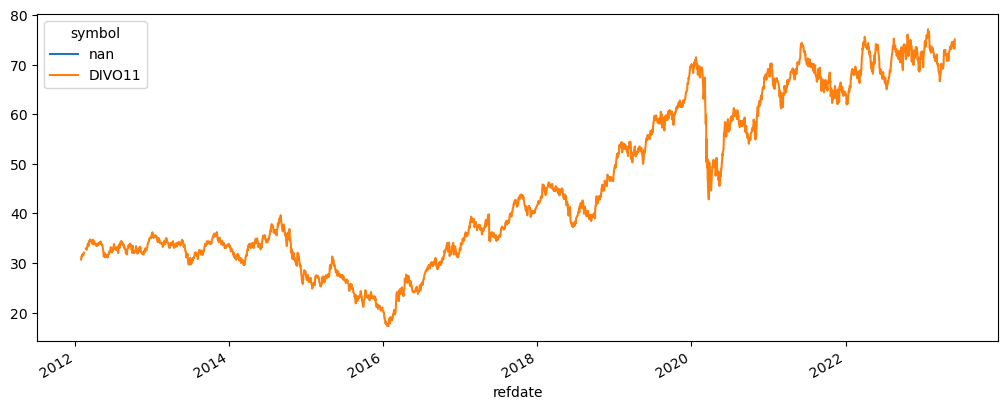

In [46]:
df.pivot(index="refdate", columns="symbol", values="close").plot()

In [72]:
df = con.sql("""
select strftime(refdate, '%Y') as year, count(*) cnt from 'b3-cotahist'
where instrument_market in (70, 80)
group by year
order by year
""").to_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

<AxesSubplot: xlabel='year'>

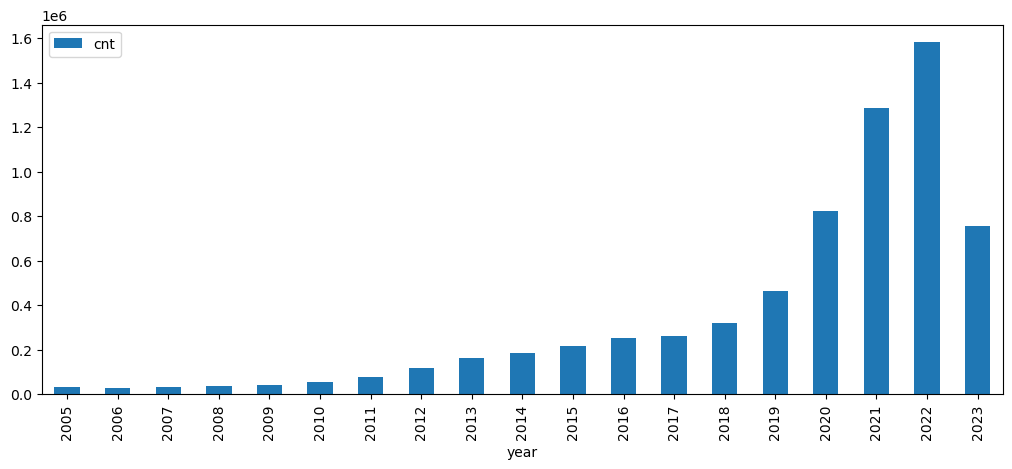

In [73]:
df.plot(x="year", y="cnt", kind="bar")

In [45]:
df = con.sql("""
select symbol, count(*) cnt from 'b3-cotahist'
where
    instrument_market = 30
    and refdate = '2023-06-01'
group by symbol
order by cnt
""").to_df()
df

,symbol,cnt
0,ABCB4T,1
1,ABEV3T,1
2,AESB3T,1
3,AGRO3T,1
4,ALUP11T,1
...,...,...
154,MGLU3T,6
155,PETR4T,6
156,PRIO3T,6
157,VIIA3T,6


In [48]:
df = con.sql("""
    select refdate, symbol, avg(close) as close from 'b3-cotahist'
    where symbol = 'VALE3T'
    group by refdate, symbol
    union all
    select refdate, symbol, close from 'b3-cotahist'
    where
        symbol = 'VALE3'
    order by refdate
""").to_df()
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,refdate,symbol,close
0,2005-01-03,VALE3,74.850000
1,2005-01-04,VALE3,71.800000
2,2005-01-04,VALE3T,73.360000
3,2005-01-05,VALE3,71.300000
4,2005-01-05,VALE3T,72.060000
...,...,...,...
7651,2023-05-31,VALE3T,66.838182
7652,2023-06-01,VALE3,65.160000
7653,2023-06-01,VALE3T,67.352857
7654,2023-06-02,VALE3,67.940000


<AxesSubplot: xlabel='refdate'>

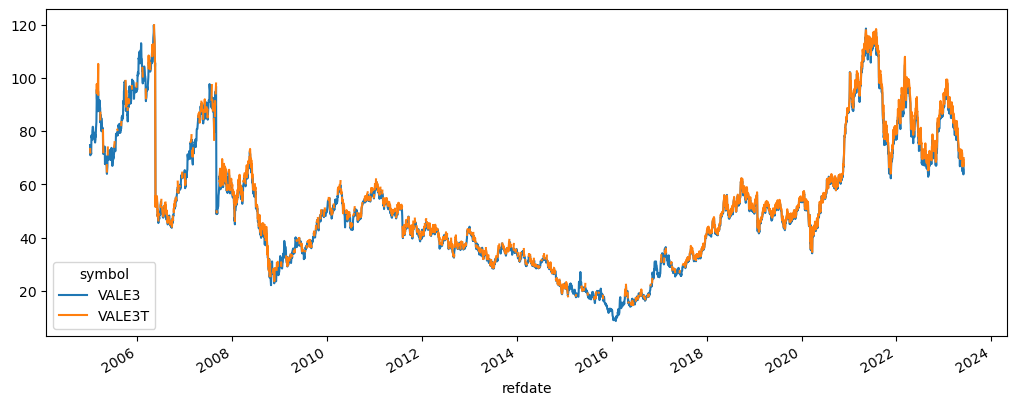

In [49]:
df.pivot(index="refdate", columns="symbol", values="close").plot()

In [50]:
df = con.sql("""
select *  from 'b3-cotahist'
where
    symbol = 'VALE3' and year(refdate) = 2005 order by refdate
""").to_df()
# df_wide = df.pivot(index="refdate", columns="symbol", values="close")
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,regtype,refdate,bdi_code,symbol,instrument_market,corporation_name,specification_code,days_to_settlement,trading_currency,open,...,trade_quantity,traded_contracts,volume,strike_price,strike_price_adjustment_indicator,maturity_date,allocation_lot_size,strike_price_in_points,isin,distribution_id
0,01,2005-01-03,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,76.50,...,314,255800,19397009.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
1,01,2005-01-04,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,74.86,...,398,280400,20568416.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
2,01,2005-01-05,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,72.05,...,410,433700,30984264.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
3,01,2005-01-06,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,71.35,...,356,207100,14612634.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
4,01,2005-01-07,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,71.87,...,443,328000,23891863.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,01,2005-12-23,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,96.50,...,154,102500,9832608.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,167
245,01,2005-12-26,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,95.60,...,76,69800,6617395.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,167
246,01,2005-12-27,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,95.40,...,247,250600,23949617.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,167
247,01,2005-12-28,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,94.55,...,360,251200,23992156.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,167


In [51]:
con.close()